#For the sample code hopfield.m supplied in the lab-work folder, find out the amount of error (in bits) tolerable for each of the stored patterns.

# Part B
I changed the hopfield.m codes to Python to do all the computations here

In [1]:
import numpy as np
from skimage import data, io, filters
from matplotlib import pyplot as plt
from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

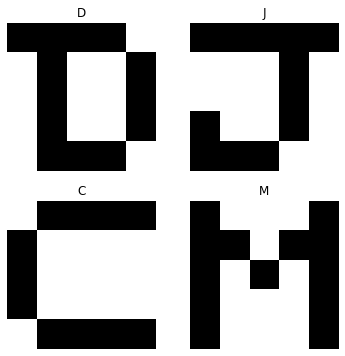

In [2]:
# Patterns to store

D = np.array([-1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1]).reshape(5,5)
J = np.array([-1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1]).reshape(5,5)
C = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1]).reshape(5,5)
M = np.array([-1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1]).reshape(5,5)

X = np.array([D, J, C, M])

letters = ['D', 'J', 'C', 'M']

fig = plt.figure(figsize=(6, 6))

for idx, letter in enumerate(X):
    plt.subplot(2, 2, idx+1)
    plt.title(letters[idx])
    plt.axis('off')
    plt.imshow(letter, cmap='gray')
plt.show()


In [3]:
# Learn the weights according to Hebb's rule

n = X.shape[0]
m = X.shape[1] * X.shape[2]

W = np.zeros((m,m));

for i in range(n):
	W += X[i, :].reshape(-1, 1) @  X[i, :].reshape(1, -1)


np.fill_diagonal(W, 0)

W /= n

In [4]:
def add_error(num_errors=1):
    chosen_letter = random.choice(X)
    letter_with_err = chosen_letter.copy()
    errors = []
    while num_errors:
        i = np.random.randint(5)
        j = np.random.randint(5)

        if (i, j) not in errors:
            errors.append((i, j))
            letter_with_err[i, j] = -letter_with_err[i, j]
            num_errors -= 1

    return chosen_letter, letter_with_err
    

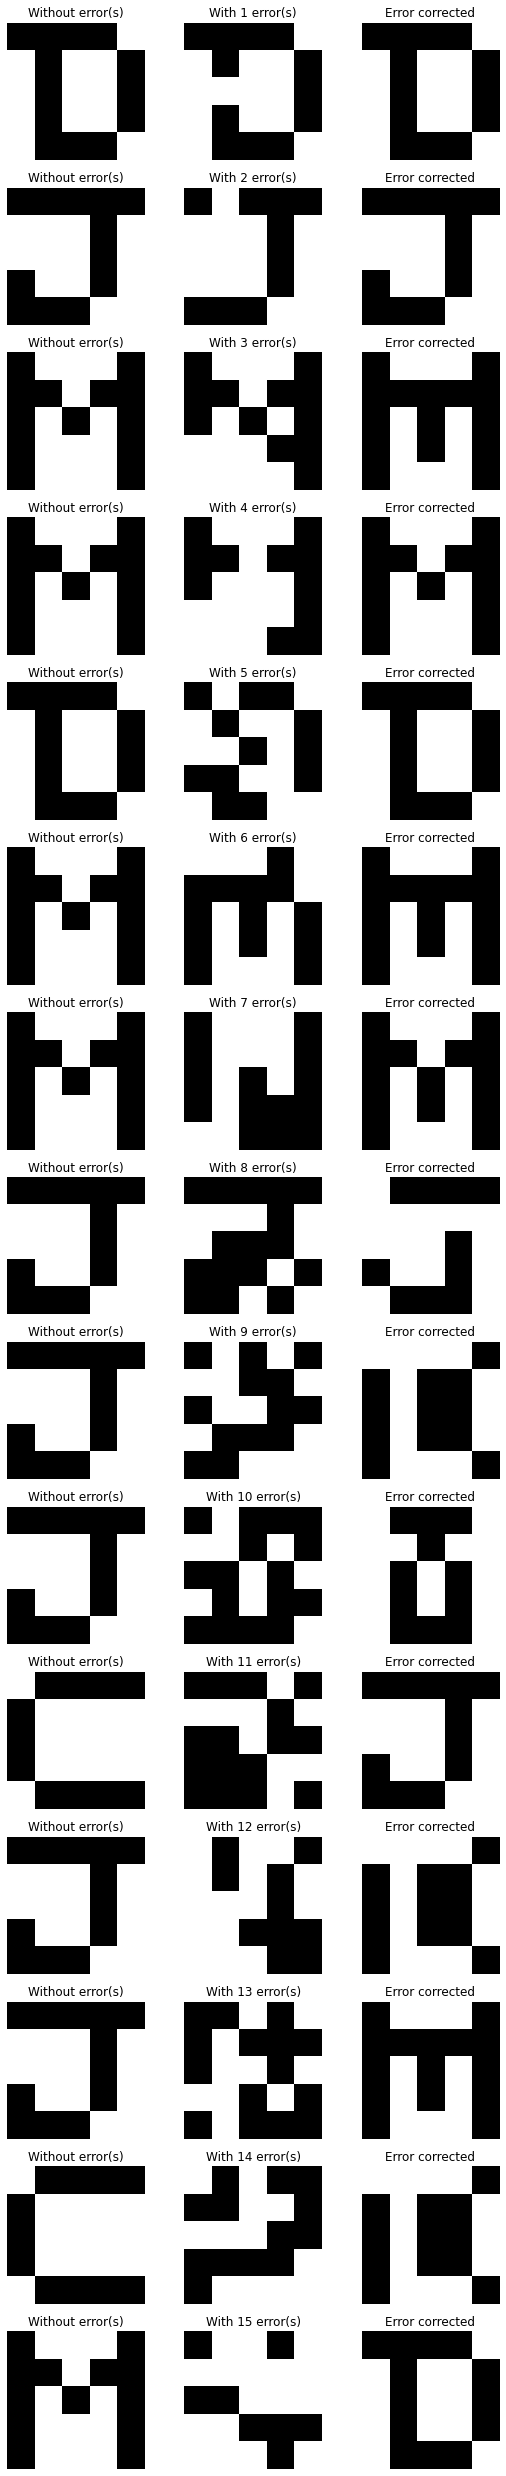

In [5]:
# Removing errors

fig = plt.figure(figsize=(9, 45))

for i in range(1, 15 + 1):
    chosen_letter, letter_with_err = add_error(i)

    y = letter_with_err.reshape(-1)

    last_erry = i
    erry = 26
    while erry != last_erry:
        last_erry = erry
        yp = np.sign(W @ y)
        erry = np.linalg.norm(yp - y)
        y = yp
    
    plt.subplot(15, 3, 3*(i-1)+1)
    plt.title('Without error(s)')
    plt.axis('off')
    plt.imshow(chosen_letter, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+2)
    plt.title(f'With {i} error(s)')
    plt.axis('off')
    plt.imshow(letter_with_err, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+3)
    plt.title('Error corrected')
    plt.axis('off')
    plt.imshow(y.reshape(5,5), cmap='gray')
plt.show()